In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split, ShuffleSplit
import warnings
from sklearn.decomposition import PCA
from itertools import chain
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering, SpectralClustering, AffinityPropagation
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from IPython.display import clear_output


In [151]:
tabela = pd.read_csv("vinho (1).csv")
display(tabela)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,nota
0,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560.0,2
1,14.37,1.95,2.50,NaN,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
2,11.82,1.47,1.99,20.8,86.0,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495.0,1
3,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0,1
4,12.08,1.13,2.51,24.0,78.0,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,11.41,0.74,2.50,21.0,88.0,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434.0,1
174,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
175,13.50,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0,0
176,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562.0,1


In [152]:
scaler = StandardScaler()
tabela_scaled = scaler.fit_transform(tabela)

print(tabela_scaled[:5])

[[ 1.39508604  1.58316512  1.36520822  1.48503834 -0.26270834 -0.39275127
  -1.2743045   1.59662258 -0.4220751   1.7864375  -1.52437837 -1.42894777
  -0.59516041  1.37386437]
 [ 1.69154964 -0.34681064  0.4879264          nan  0.93091845  2.49144552
   1.46652465 -0.98187536  1.03215473  1.18332148 -0.42754369  1.18407144
   2.33457383 -1.21394365]
 [-1.45837602 -0.77768895 -1.37629746  0.37648136 -0.96484175 -0.50491447
  -0.43097246 -0.49840699 -0.10669995 -1.33684191 -0.03268321  1.01457831
  -0.8021525   0.07996036]
 [-0.77898029 -1.0469879  -1.63217132  0.01694937 -1.52654847 -0.29661137
  -0.02938577 -0.74014117 -0.96522118 -0.16076567  0.71316437  1.22644473
  -0.7543851   0.07996036]
 [-1.13720713 -1.08289442  0.52447981  1.33523334 -1.52654847 -0.47286784
  -0.45105179  0.30737361 -0.33447089 -1.22914262  1.54675873  0.15298819
  -0.37224585  0.07996036]]


In [153]:
tabela.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,nota
0,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560.0,2
1,14.37,1.95,2.50,NaN,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
2,11.82,1.47,1.99,20.8,86.0,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495.0,1
3,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0,1
4,12.08,1.13,2.51,24.0,78.0,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630.0,1


In [95]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             175 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               176 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  nota 

In [96]:
tabela.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,nota
count,178.000000,178.000000,178.000000,175.000000,178.000000,178.000000,178.000000,178.000000,178.000000,176.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.543429,99.741573,2.295112,2.029270,0.361854,1.590899,5.053182,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.347250,14.282484,0.625851,0.998859,0.124453,0.572359,2.327901,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.300000,88.000000,1.742500,1.205000,0.270000,1.250000,3.200000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [97]:
tabela.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,nota
alcohol,1.000000,0.094397,0.211545,-0.301057,0.270798,0.289101,0.236815,-0.155929,0.136698,0.545663,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.284446,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248833,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.453707,0.286587,0.128980,0.115077,0.186230,0.009652,0.260470,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.301057,0.284446,0.453707,1.000000,-0.072465,-0.310553,-0.340740,0.353811,-0.193515,0.023871,-0.276593,-0.268740,-0.430892,0.509801
magnesium,0.270798,-0.054575,0.286587,-0.072465,1.000000,0.214401,0.195784,-0.256294,0.236441,0.204210,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.310553,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.048491,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.340740,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.166986,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.353811,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.134503,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.193515,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.022177,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.545663,0.248833,0.260470,0.023871,0.204210,-0.048491,-0.166986,0.134503,-0.022177,1.000000,-0.522108,-0.426052,0.319498,0.261269


In [98]:
tabela.value_counts()

alcohol  malic_acid  ash   alcalinity_of_ash  magnesium  total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity  hue   od280/od315_of_diluted_wines  proline  nota
11.03    1.51        2.20  21.5               85.0       2.46           2.17        0.52                  2.01             1.90             1.71  2.87                          407.0    1       1
13.50    1.81        2.61  20.0               96.0       2.53           2.61        0.28                  1.66             3.52             1.12  3.82                          845.0    0       1
13.40    3.91        2.48  23.0               102.0      1.80           0.75        0.43                  1.41             7.30             0.70  1.56                          750.0    2       1
         4.60        2.86  25.0               112.0      1.98           0.96        0.27                  1.11             8.50             0.67  1.92                          630.0    2       1
13.41    3.84        2.12  18.

In [154]:
tabela.isnull().sum()


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               3
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 2
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
nota                            0
dtype: int64

In [135]:
tabela_sem_nulos = tabela.dropna()
tabela_sem_nulos

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,nota
0,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560.0,2
2,11.82,1.47,1.99,20.8,86.0,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495.0,1
3,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0,1
4,12.08,1.13,2.51,24.0,78.0,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630.0,1
5,13.83,1.57,2.62,20.0,115.0,2.95,3.40,0.40,1.72,6.60,1.13,2.57,1130.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,11.41,0.74,2.50,21.0,88.0,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434.0,1
174,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
175,13.50,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0,0
176,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562.0,1


In [156]:


x = tabela_sem_nulos[['alcohol','malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']].values
y = tabela_sem_nulos[['nota']]



In [157]:
x

array([[1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02],
       [1.182e+01, 1.470e+00, 1.990e+00, ..., 9.500e-01, 3.330e+00,
        4.950e+02],
       [1.237e+01, 1.170e+00, 1.920e+00, ..., 1.120e+00, 3.480e+00,
        5.100e+02],
       ...,
       [1.350e+01, 1.810e+00, 2.610e+00, ..., 1.120e+00, 3.820e+00,
        8.450e+02],
       [1.146e+01, 3.740e+00, 1.820e+00, ..., 7.500e-01, 2.810e+00,
        5.620e+02],
       [1.332e+01, 3.240e+00, 2.380e+00, ..., 5.500e-01, 1.620e+00,
        6.500e+02]])

In [158]:
y

,nota
0,2
2,1
3,1
4,1
5,0
...,...
173,1
174,0
175,0
176,1


In [159]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [160]:
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)


x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, random_state=42)



        
print_formatted(x_test)


-0.8, -1.1, -0.3, -1.1, 0.1, -0.4, -0.9, 2.1, -2.0, -0.8, 1.3, -1.3, -0.2
0.9, -0.8, 0.5, -0.8, 0.6, 1.8, 1.7, -1.4, 0.8, 0.8, -0.3, 0.4, 1.8
-0.1, 1.3, 1.0, -0.3, 0.2, 0.2, 0.4, -0.9, 0.7, -0.2, 0.3, 1.3, 0.1
-0.8, -1.0, 0.7, -0.4, -0.1, 0.2, 0.6, 0.1, 0.9, -0.2, 1.0, -0.4, -0.2
0.1, -0.5, -1.2, -2.1, -0.5, 0.7, 1.3, -1.6, 2.3, 0.9, 0.7, 0.4, 1.3
-0.3, 1.4, 0.1, 1.0, 0.1, 0.9, 0.5, 0.5, 0.6, -1.1, 1.0, 0.7, -0.9
0.9, 3.0, 0.3, 0.3, -0.3, -1.0, -1.4, 1.3, -0.9, 1.1, -1.4, -1.2, 0.0
0.5, 0.2, -0.1, 0.1, -0.7, -1.4, -1.5, 0.1, -1.6, 0.2, -1.1, -0.2, 0.1
0.7, -0.6, -0.0, -0.1, 0.4, 0.9, 1.2, -1.2, 0.6, 0.8, 0.6, 0.4, 2.5
-1.3, -1.1, -0.2, 0.4, 0.1, 1.8, 0.1, -1.9, 0.1, -0.8, 0.1, 0.7, 0.5
0.6, -0.6, 1.0, 0.9, -0.7, 0.5, -0.9, 1.3, 1.2, 2.9, -1.7, -1.2, -0.4
-0.1, 0.6, 0.1, 0.1, 0.3, -1.6, -0.8, -1.0, -1.3, 0.2, -1.0, -1.7, -0.7
-0.6, 0.1, -0.7, 0.4, -0.8, 0.4, 0.3, -0.8, -0.6, -1.3, -0.3, 0.2, -1.3
0.5, -0.5, 0.9, -1.0, -0.5, 0.9, 0.9, -0.2, -0.2, -0.1, -0.2, 0.9, 1.5
1.5, 0.2, 0.4, 0.1, 

In [163]:
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)


x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, random_state=42)




print_formatted(x_train)

0.3, 0.2, 1.8, 0.4, 1.3, 0.8, 0.7, 0.2, 0.4, -0.3, 0.4, 0.5, -0.0
1.7, -0.4, 0.3, -1.5, -0.3, 0.4, 0.5, -0.5, 0.7, 0.1, 0.3, 1.4, 1.8
-0.2, 0.3, 0.4, 0.7, 0.9, -1.3, -0.7, -1.0, -0.6, 2.5, -2.1, -1.6, -0.8
-0.9, -0.9, -1.5, -0.2, -0.5, 0.1, 0.0, 0.2, 0.9, -1.0, -0.4, 0.6, -1.4
0.6, 1.1, -0.6, -0.0, -0.8, -1.1, -1.6, 1.7, -1.2, 0.3, -0.6, -1.1, -0.5
2.3, -0.6, -0.7, -1.7, -0.2, 0.8, 1.0, -0.6, 0.7, 0.1, 0.5, 0.3, 1.0
1.1, -0.6, -0.9, -1.1, 0.1, 1.3, 1.4, -1.2, 1.0, 0.5, -0.2, 1.0, 0.8
-0.8, -1.0, -1.6, 0.0, -1.5, -0.3, -0.0, -0.7, -1.0, -0.1, 0.7, 1.2, -0.7
0.1, -1.3, -2.4, -1.1, -0.9, -0.5, 0.0, -1.0, -0.2, -0.2, 1.0, -0.2, -1.1
1.5, -0.5, 0.3, -1.3, 0.9, 1.6, 1.4, -0.2, 0.7, 0.7, 0.4, 0.3, 2.3
-0.5, -0.9, -1.0, 0.1, 0.2, -1.3, -1.4, 1.3, -0.3, 1.1, -1.6, -1.5, -0.3
1.3, -0.6, -0.6, -1.1, -0.3, 0.6, 0.3, -0.8, 0.7, -0.1, 0.4, 1.4, 1.0
1.0, -0.4, 1.1, -0.7, 1.1, 1.2, 0.8, 0.2, 0.2, 0.5, 0.7, 0.5, 2.1
-1.1, -0.1, -0.7, 0.4, -1.0, 0.5, 0.6, 0.1, -0.4, -1.0, -0.4, 1.0, -1.2
0.1, -0.2, 3.1,

In [164]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(x_test)

In [165]:
mms = MinMaxScaler()
x_train_norm = mms.fit_transform(x_train)
x_test_norm = mms.transform(x_test)


imputer = SimpleImputer(strategy='mean')
x_train_norm_no_nan = imputer.fit_transform(x_train_norm)

In [166]:
x_train_norm[0]

array([0.58157895, 0.36561265, 0.81182796, 0.58100559, 0.52173913,
       0.61151079, 0.6416185 , 0.51020408, 0.44303797, 0.25938567,
       0.45528455, 0.60805861, 0.32596291])

In [167]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(x_train)
X_test_std = stdsc.transform(x_test)

In [194]:
X_train_std[0]

array([ 0.31491188,  0.25071889,  1.7955536 ,  0.44011056,  1.23837845,
        0.92453362,  0.74470432,  0.17118115,  0.38467647, -0.28947116,
        0.3154586 ,  0.47579093, -0.00829757])

In [169]:
clf = DecisionTreeClassifier()

# Treina o modelo de Árvore de Decisão
clf.fit(X_train, y_train)

DecisionTreeClassifier()

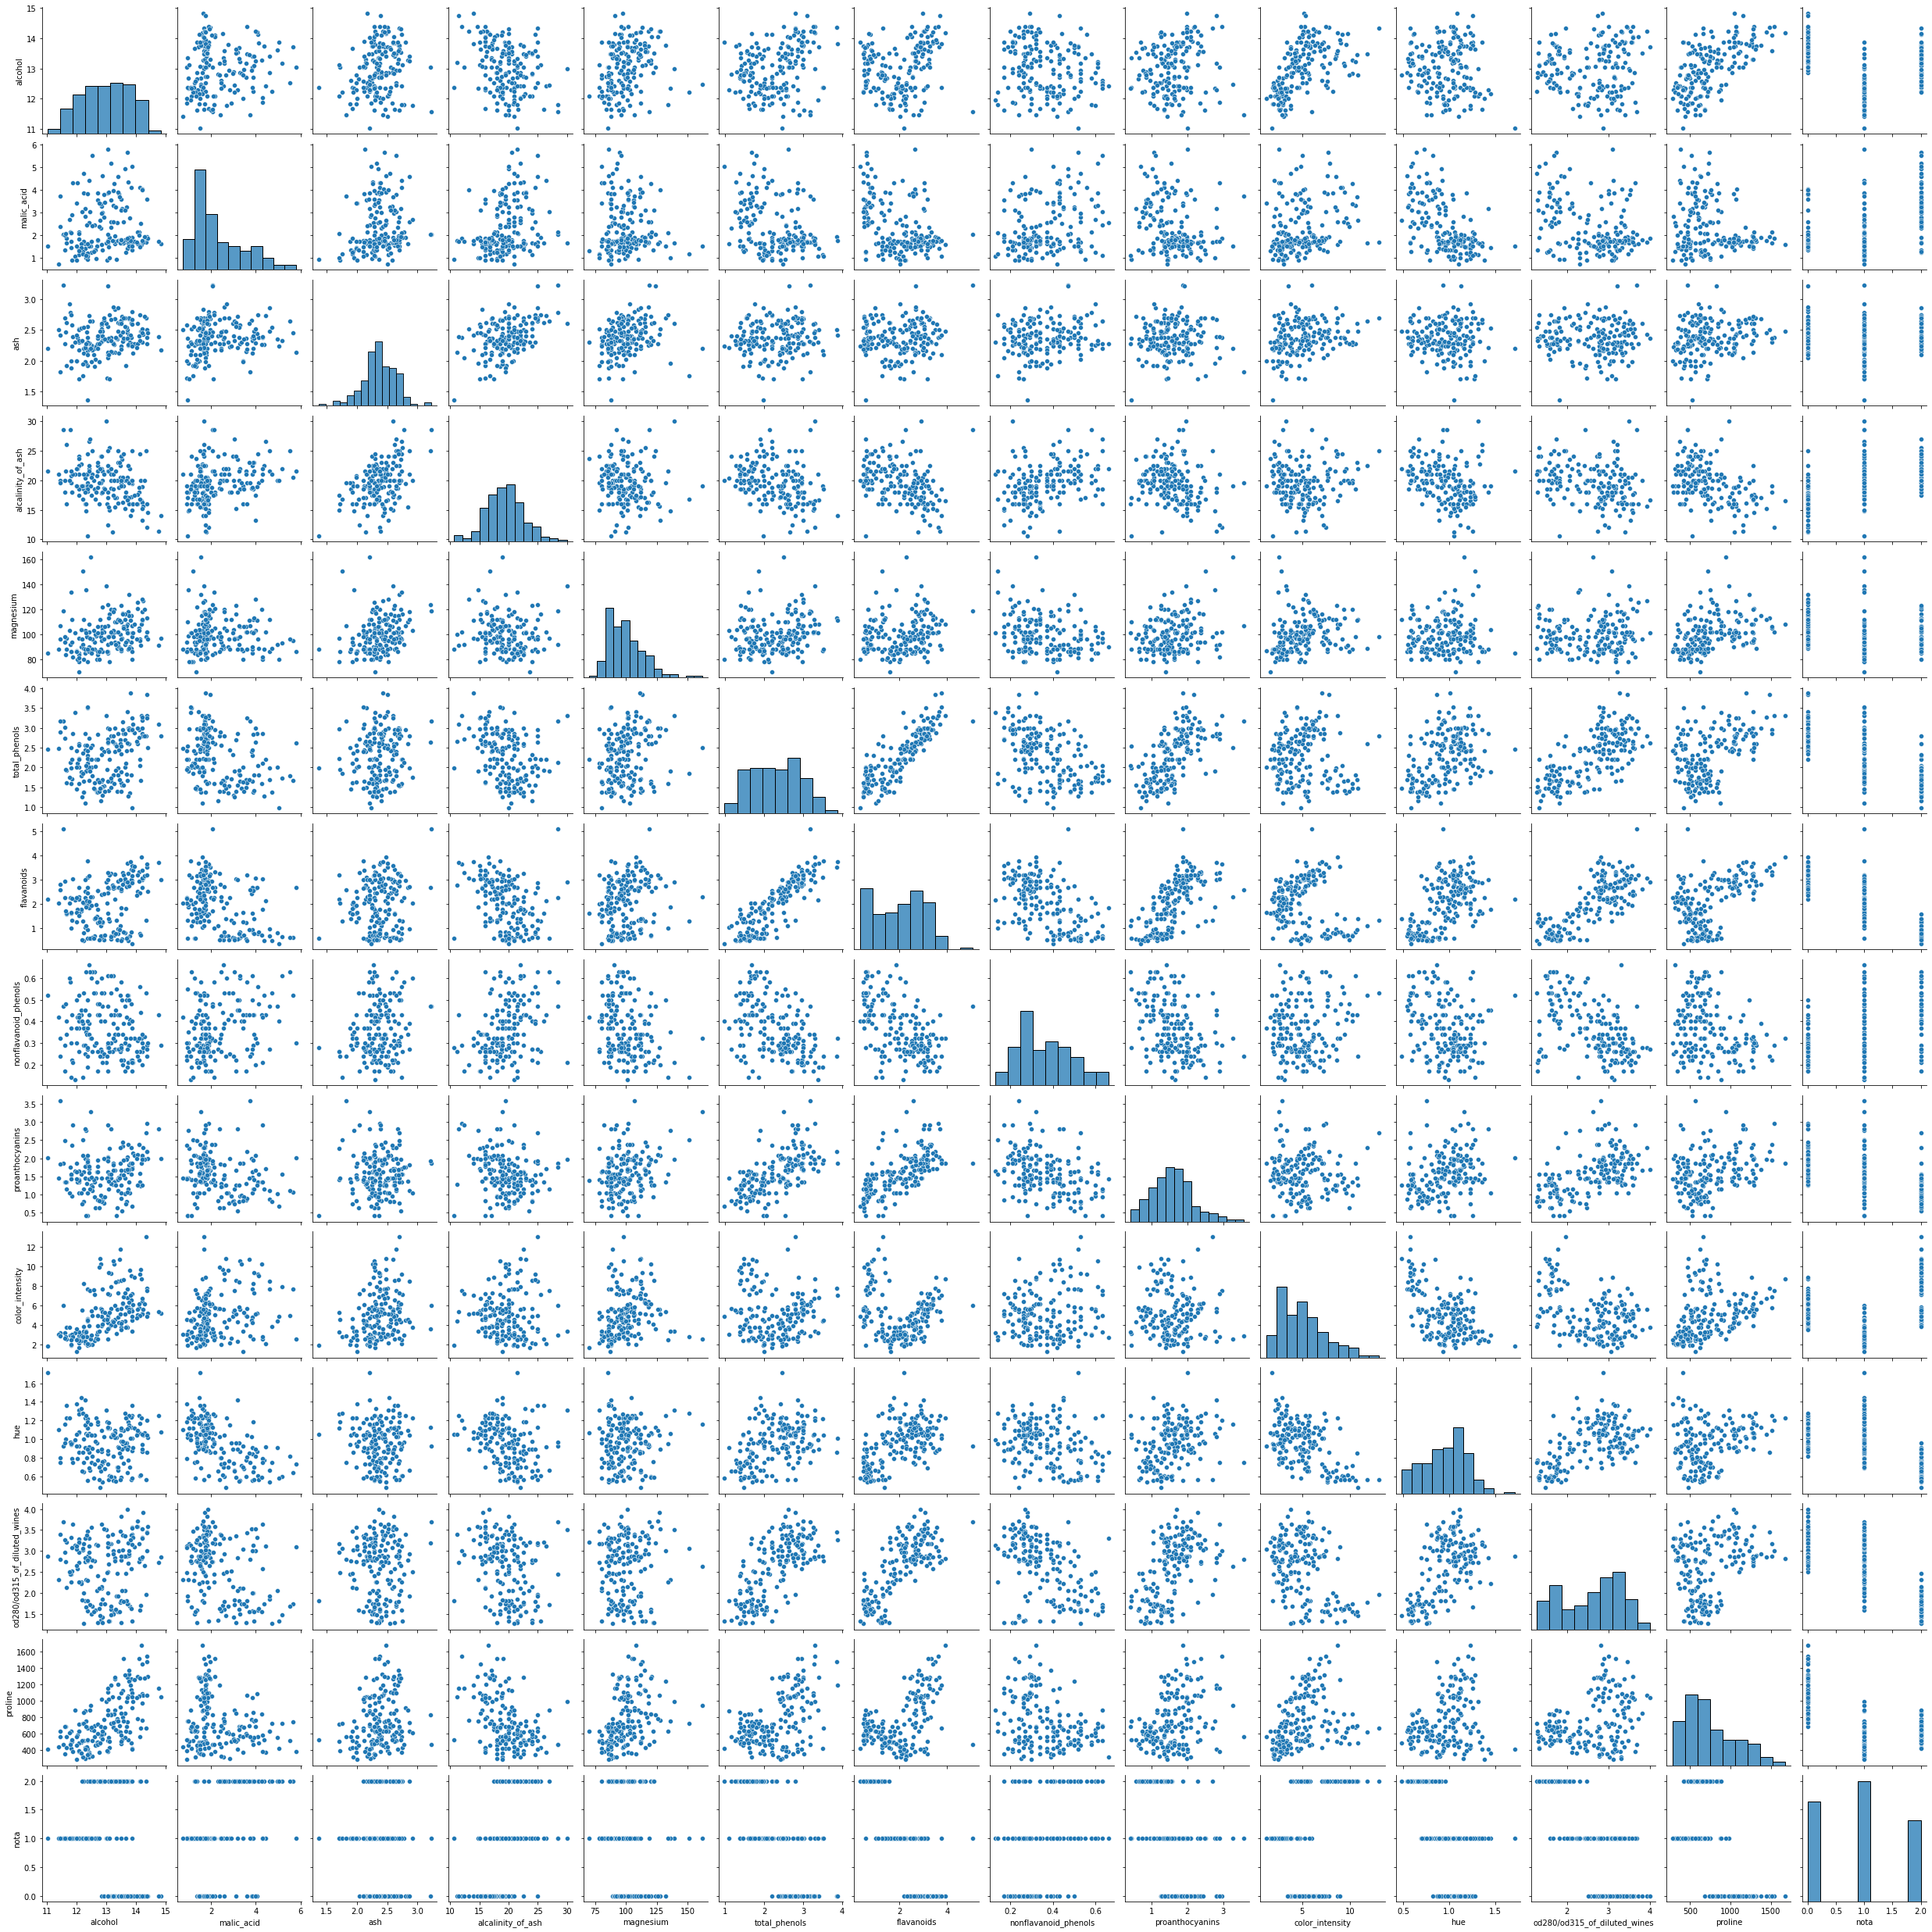

In [197]:
sns.pairplot(tabela)

In [170]:
y_predict = clf.predict(x_test)
y_predict

array([2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [171]:
acc = accuracy_score(y_test, y_predict)
print("Acurácia: {:.2f}%".format(acc * 100))

Acurácia: 42.86%


In [179]:
clf.classes_

array([0, 1, 2], dtype=int64)

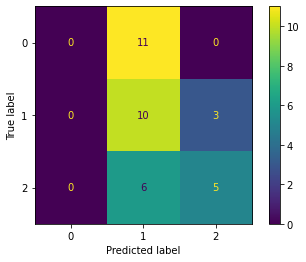

In [192]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_predict), display_labels=clf.classes_).plot()